In [347]:
from meteostat import Point, Daily, Stations
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path  

In [448]:
stations = Stations()
# PARAMETERS :
# Distance max au cas où un point random est trop loin d'une station :
distance_max = 100000
# Set time period :
start = datetime(2020, 1, 1)
end = datetime(2022, 1, 1)
# Create Points :
MAT_x = np.arange(43.7, 50.4, 0.2)
MAT_x = np.arange(-60, 82, 1)
MAT_y = np.arange(-4.5, 7.25, 0.2)
MAT_y = np.arange(-179, 180,1)
MAT = np.zeros((MAT_x.shape[0],MAT_y.shape[0], 2))
# print(MAT.shape)

-5 43
id
63845    353645.33705
Name: distance, dtype: float64
-4 43
id
63772    308243.283946
Name: distance, dtype: float64
-3 43
id
63772    254107.595778
Name: distance, dtype: float64
-2 43
id
63270    192230.882009
Name: distance, dtype: float64
-1 43
id
63270    94494.023671
Name: distance, dtype: float64
0 43
id
63270    75055.619618
Name: distance, dtype: float64
1 43
id
63270    164515.618115
Name: distance, dtype: float64
2 43
id
63624    249097.853897
Name: distance, dtype: float64
3 43
id
63624    163070.040298
Name: distance, dtype: float64
4 43
id
63624    125933.904995
Name: distance, dtype: float64
5 43
id
63624    172778.101359
Name: distance, dtype: float64
6 43
id
63478    201791.581361
Name: distance, dtype: float64
7 43
id
63476    252509.328641
Name: distance, dtype: float64
-5 44
id
63845    464134.140166
Name: distance, dtype: float64
-4 44
id
63772    400943.371999
Name: distance, dtype: float64
-3 44
id
63270    340668.060287
Name: distance, dtype: float64
-2 

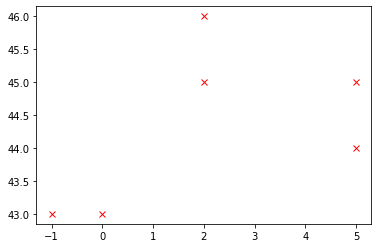

In [434]:
mat_real=[]
for elta in MAT_x:
    for eltb in MAT_y:
        print(eltb,elta)
        stations = stations.nearby(eltb, elta)
        # station_data = 
        station_name = stations.fetch(1)
        d=float(station_name.distance.iloc[0])
        print(station_name.distance)
        if d<distance_max:
            data = Daily(Point(eltb, elta), start, end)
            data = data.fetch()
            data.drop(["snow","wpgt","tsun"], axis=1, inplace=True)
            path = Path(f"/Users/simontrottier/Documents/Polimi/Nonparametric stat/stat_project/Data/{eltb}_{elta}.csv")
            data.to_csv(path)
            mat_real.append([eltb,elta])
            
            
for elt in mat_real:
    plt.plot(elt[0],elt[1],'rx')

In [449]:
## CREATION DE LA BDD REFERENCE : (avec toutes les stations qu'on va utiliser)

for x in range(MAT_x.shape[0]):
    for y in range(MAT_y.shape[0]):
        MAT[x, y] = (MAT_x[x], MAT_y[y])
# print(MAT)

# Create Point for all points in MAT
col_names = stations.nearby(0, 0).fetch(1).columns
loc_df = pd.DataFrame(columns=col_names)
for elt in MAT:
    for elt_bis in elt:
        stations = stations.nearby(elt_bis[0], elt_bis[1])
        # station_data = 
        station_name = stations.fetch(1)
        station_name = station_name[col_names]
        # print(station_name)
        loc_df = pd.concat([loc_df, station_name], ignore_index=True)

dist_df = pd.DataFrame(columns=["name", "distance"])
dist_df = loc_df.loc[:,["name", "distance"]]
#print(dist_df)
dist_df = dist_df.groupby("name").min()
#print(dist_df)
loc_df.drop("distance", axis=1, inplace=True)
#print(loc_df)
loc_df.drop_duplicates(inplace=True)
#print(loc_df)
loc_df = loc_df.join(dist_df,on='name')
#print(loc_df)
loc_df.drop(loc_df[loc_df.distance > distance_max].index, inplace=True)
#print(loc_df)
loc_df.drop(loc_df[loc_df.daily_start > start].index, inplace=True)
loc_df.drop(loc_df[loc_df.daily_end < end].index, inplace=True)
#print(loc_df)
loc_df.drop(["hourly_start", "hourly_end", "monthly_start", "monthly_end"], axis=1, inplace=True)
loc_df.dropna(inplace=True)

In [450]:
loc_df

,name,country,region,wmo,icao,latitude,longitude,elevation,timezone,daily_start,daily_end,distance
328,Macquarie Island*,AU,TAS,94998,YMMQ,-54.5000,158.9000,6.0,Australia/Hobart,1973-01-01,2023-10-27,55966.607793
1535,Punta Arenas,CL,MA,85934,SCCI,-53.0000,-70.8500,37.0,America/Punta_Arenas,1963-07-02,2023-10-26,10037.814775
1903,Ushuaia Aerodrome,AR,V,87938,SAWH,-54.8000,-68.3167,16.0,America/Argentina/Ushuaia,1957-06-30,2023-10-26,49022.832059
2264,Rio Grande B. A.,AR,V,87934,SAWE,-53.8000,-67.7500,13.0,America/Argentina/Ushuaia,1973-01-01,2023-10-26,27619.542378
2981,Rio Gallegos Aerodrome,AR,Z,87925,SAWG,-51.6167,-69.2833,20.0,America/Argentina/Rio_Gallegos,1956-02-01,2023-10-26,46860.467869
...,...,...,...,...,...,...,...,...,...,...,...,...
48544,Resolute Bay Airport,CA,NU,71924,CYRB,74.7200,-94.9700,68.0,America/Resolute,1947-10-01,2023-10-25,31146.766351
48557,Grise Fiord,CA,NU,71971,CWGZ,76.4200,-82.9000,44.0,America/Iqaluit,2007-11-01,2023-10-26,46777.003578
48634,Danmarkshavn,GL,UO,04320,BGDH,76.7667,-18.6667,11.0,America/Godthab,1958-01-01,2023-10-28,27270.976403
49608,Isachsen,CA,NU,71074,CWIC,78.7900,-103.5500,58.0,America/Cambridge_Bay,1948-05-05,2023-09-17,25261.466284


In [446]:
a = loc_df[loc_df.country== "FR"]
len(a)

36

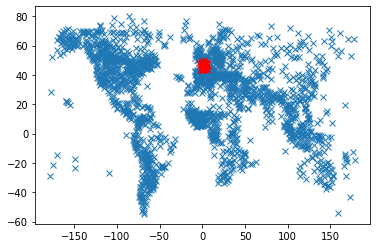

In [452]:
lati_list = list(loc_df["latitude"])
long_list = list(loc_df["longitude"])

lati_list_pays = list(a["latitude"])
long_list_pays = list(a["longitude"])

plt.plot(long_list,lati_list,'x',long_list_pays,lati_list_pays,'rx')

data = Daily(Point(50.5, 1.7), start, end)
data = data.fetch()

#path = Path(f"/Users/simontrottier/Documents/Polimi/Nonparametric stat/stat_project/Data/zzz.csv")
#data.to_csv(path)

In [454]:
# Dico
from pathlib import Path  
lati_long_list = loc_df[["latitude", "longitude","name"]]

dico = dict()
for idx in range(lati_long_list.shape[0]):
    data = Daily(Point(tuple(lati_long_list.iloc[idx])[0], tuple(lati_long_list.iloc[idx])[1]), start, end)
    data = data.fetch()
    data.drop(["snow","wpgt","tsun"], axis=1, inplace=True)
    a=tuple(lati_long_list.iloc[idx])[2].replace("/","_")
    path = Path(f"/Users/simontrottier/Documents/Polimi/Nonparametric stat/stat_project/Data/{a}.csv")
    print(a)
    data.to_csv(path)
    dico[tuple(lati_long_list.iloc[idx])[2]] = data




Macquarie Island*
Punta Arenas
Ushuaia Aerodrome
Rio Grande B. A.
Rio Gallegos Aerodrome
San Julian Aerodrome
Isla De Pascua
Puerto Deseado Aerodrome
Gobernador Gregores Aerodrome
Perito Moreno Aerodrome
Comodoro Rivadavia Aerodrome
Christchurch
Quellon
Balmaceda
Coyhaique
Alto Palena
Paso De Indios
Trelew Aerodrome
Chalten _ Chaiten _ Chaitén
Futaleufu _ Futaleufú
Esquel Aerodrome
Viedma Aerodrome
Puerto Montt
Bariloche Aerodrome
San Antonio Oeste Aerodrome
Tres Arroyos
Port Elizabeth, Port E Apt
Valdivia
Neuquen Aerodrome
Bahia Blanca Aerodrome
Temuco
East London Airport
Concepcion
Pigue Aerodrome
Tandil Aerodrome
Mar Del Plata Aerodrome
Port St Johns
Moorabbin Airport
Chillan
Malargue Aerodrome
Santa Rosa Aerodrome
Dolores Aerodrome
San Rafael Aerodrome
General Pico Aerodrome
Pehuajo Aerodrome
Fort-Dauphin
Albury Airport
Cooma
Raoul Island, Kermadec Island
Curico
Villa Reynolds Aerodrome
Laboulaye
Junin Aerodrome
Ezeiza Aerodrome
La Plata Aerodrome
Carrasco
Balranald
Wagga Wagga
San

Palma De Mallorca _ Son San Juan
Menorca _ Mahon
Cagliari _ Elmas
Ustica
Lamezia Terme
Kerkyra Airport
Aktion Airport
Anchialos Airport
Mytilini Airport
Akhisar
Usak
Afyon
Kayseri _ Erkilet
Sivas
Malatya _ Erhac
Elazig
Chardzhev
Karshi
Kashi
Jiuquan
Dalian
Pyongyang
Hanamaki Airport
Shemya Eareckson As
Adak Island Airport
Red Bluff Municipal Airport
Chico
Lovelock _ Granite Point
Eureka _ Eunice Place
Wendover _ Air Force Auxillary Field
Price Carbon County Airport
Roosevelt
Rosecrans Memorial Airport
Dayton _ Wright-Patterson Air Force Base
Port Columbus International  Airport
LaGuardia Airport
Monte Real
Madrid _ Torrejon
Capo Bellavista
Ponza
Capri
Capo Palinuro
Marina Di Ginosa
Lecce
Ioannina Airport
Kozani Airport
Thessaloniki Airport
Limnos Airport
Canakkale
Bandirma
Bursa
Eskisehir
Murted Tur-Afb
Tokat
Erzincan
Erzurum
Agri
Navoi
Samarkand
Dzizak
Hohhot
Beijing
Kimchaek
Winnemucca Municipal Airport
Elko _ Coin
Rock Springs-Sweetwater Co
Sidney Municipal Airport
North Platte Regi

Barcelona _ Aeropuerto
Alghero
Olbia _ Costa Smeralda
Grazzanise
Brindisi
Chrysoupoli Airport
Alexandroupoli Airport
Kastamonu
Merzifon
Trabzon
Kars
Namangan
Hami
Ominato Ab
Kushiro
Rogue Valley International  Airport
Rawlins _ Sinclair
Chicago O’hare Airport
Harrow CDA
Erieau
Erie International Airport
Binghamton Regional Airport
Bradley International Airport
Worcester _ West Tatnuck
Vigo _ Peinador
Braganca
Valladolid _ Villanubla
Burgos _ Villafria


Zaragoza _ Aeropuerto
Gerona _ Costa Brava
Ajaccio
Monte Argentario
Civitavecchia
Pescara
Termoli
Dubrovnik _ Cilipi
Plovdiv
Zonguldak
Dashkhovuz
Tamdy
Shenyang _ Fengt'ien _ Mukden _ Luoguantun
Kindakun Rocks
Solander Island
North Bend
Edenbower
Burns Municipal Airport
Pocatello Regional Airport
Lander Hunt Field
Riverton Regional Airport
Natrona County International  Airport
Douglas Converse County
Miller Field - Valentine, Ne
Winner, Bob Wiley Field Airport
Madison Dane County Rgnl
Gen Mitchell International Airport
Muskegon County Airport
Flint Bishop International  Airport
Hamilton Airport
Syracuse Hancock International  Airport
Western Head
Santiago _ Labacolla
Leon _ Virgen Del Camino
Santander _ Parayas
Vitoria
Tarbes Ossun Lourdes
St-Girons
Carcassonne
Calvi
Grosseto
Perugia
Sofia Observ.
Varna
Adler
Almaty
Yining
Changchun
Vladivostok
Boise Air Terminal
Cody
Gillette-Campbell Cty Airport
Rapid City Regional Airport
Chamberlain Municipal Airport
Acacia Falls Mobile Home Court


Plymouth
Abbeville
Karlovy Vary
Praha _ Ruzyne
Caslav
Pardubice
Krakow
Rzeszow-Jasionka
L'Viv
Kharkiv
Aktjubinsk
Karaganda
Semipalatinsk
Troickoe
Port Hardy Airport
Fanny Island
Lillooet
Gleichen AGCM
Leader Airport
Lucky Lake
Mccreary
Fisher Branch
Victoria Beach
Ear Falls
Bonnard 1
Sept-iles
Longue-Pointe-De-Mingan
Havre St Pierre
Ferolle Point
Prins Christian Sund
Cork Airport
Chivenor
Yeovilton
Boscombe Down
Odiham
London Gatwick Airport
Manston
Schaffen
Geilenkirchen
Erfurt _ Bindersleben
Jelenia Gora
Wroclaw Copernicus Airport
Czestochowa
Kielce
Lublin Radawiec
Zamosc
Sumy
Saratov
Uralsk
Orsk
Kodiak Airport
McInnes Island
Cathedral Point
Tatlayoko Lake RCS
Puntzi Mountain
Williams Lake Airport
Sundre Airport
Red Deer Regional Airport
Big Valley AGCM
Bodo Agdm
Wynyard
Swan River RCS
Berens River CS
Red Lake Airport
Lansdowne House
Moosonee RCS
Lac Benoit
Lac Eon
Mary's Harbour, Nfld.
Aberporth


Stansted Airport


Wattisham
Deelen
Zielona Gora
Lodz
Warszawa-Okecie
Gomel'
Irkutsk
Ulan-Ude
Horinsk
Chita
Cumshewa Island
Quesnel Airport
Jasper Warden
Thorsby AGCM
Camrose
North Battleford
Spiritwood West
Melfort
Nipawin
Hudson Bay
George Island
Island Lake Airport
Muskrat Dam
Big Trout Lake Remote Environment Automatic Data Acquisition Concept, Ontario
Wabush Airport
Churchill Falls, Nfld.
Goose Airport
Angisoq
Casement Aerodrome
Hawarden
Manchester Airport
Coningsby Royal Air Force Base
De Kooy
Leeuwarden
Luechow
Miroslawiec _ Borujsko
Torun
Bialystok
Brjansk
Penza
Samara
Barnaul
Ekimchan
Nikolaevsk-Na-Amure
Petropavlovsk-Kamchatskij
Middleton Island Airport
Ootsa Lakeskins Lake
Hendrickson Creek
Edson, Alta.
St. Paul AGCM
Meadow Lake Airport
Waskesiu Lake
Peawanuck
La Grande Riviere Airport
La Grande Iv
Schefferville
Connaught Airport
Dublin Airport
Isle Of Man _ Ronaldsway Airport
Walney Island
Norderney
Elblag
Ketrzyn
Mikolajki
Suwalki
Minsk
Saransk
Novokuznetsk _ Spichenkovo _ Luchshevo
Cold Bay

In [455]:
path = Path("/Users/simontrottier/Documents/Polimi/Nonparametric stat/stat_project/Noms-lat-long.csv")
lati_long_list.to_csv(path)

In [329]:
dico

{'Macquarie Island*':             tavg  tmin  tmax  prcp   wdir  wspd    pres
 time                                                   
 2020-01-01   8.1   6.8   9.5   NaN  334.0  37.3   997.6
 2020-01-02   6.9   4.3   8.4   NaN  322.0  34.1   990.3
 2020-01-03   5.2   2.7  14.8   NaN  223.0  43.4   996.9
 2020-01-04   7.9   3.1   9.2   NaN  332.0  25.3  1001.0
 2020-01-05   6.3   3.3  13.8   NaN  147.0  35.6   972.2
 ...          ...   ...   ...   ...    ...   ...     ...
 2021-12-28   4.5   3.2   5.8   1.3  270.0  34.6   997.8
 2021-12-29   4.4   2.6   5.9   6.1  245.0  13.7   992.4
 2021-12-30   6.8   2.2   8.6   8.9  306.0  34.3   996.3
 2021-12-31   5.9   5.2   7.5   1.3  299.0  55.3   981.6
 2022-01-01   7.7   4.4  10.6   1.5  322.0  33.7   996.9
 
 [732 rows x 7 columns],
 'Punta Arenas':             tavg  tmin  tmax  prcp   wdir  wspd    pres
 time                                                   
 2020-01-01  14.9   7.3  21.2   0.0  301.0  25.8  1008.3
 2020-01-02  15.1  10.0 

0
0
0
0
0
0


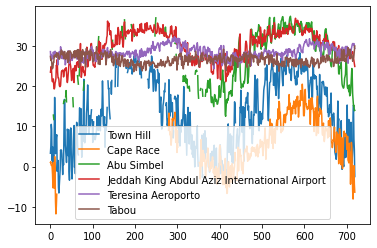

In [490]:
import random as rd
Noms = list(loc_df["name"][1154:1156])+list(loc_df["name"][784:786])+list(loc_df["name"][334:336])

tab=[]
ref=0
for elt in Noms:
    deb=ref+360*rd.randint(0,1)*0
    t=list(dico[elt].tavg)[deb:deb+720]
    print(deb)
    if len(t)>0:
        plt.plot(range(720),t)
    
plt.legend(Noms)



In [524]:
for elt in Noms:
    t=list(dico[elt].wdir)[360:720]
    t_cos = np.sum(np.cos([np.pi*x/180 for x in t if np.isnan(x) == False]))
    t_sin = np.sum(np.sin([np.pi*x/180 for x in t if np.isnan(x) == False]))
    a = [rd.random()*2*np.pi for _ in range(360)]
    a_sin = np.sum(np.sin(a))
    a_cos = np.sum(np.cos(a))
    e = t_cos+t_sin*1j
    f = a_cos+a_sin*1j
    print(e,f)
a




(291.59156577028796-78.32759189834152j) (-29.002614582687443-12.563445959192176j)
(-32.25542508655111-116.3822916813412j) (-21.413534856309425-1.8824966060918726j)
(319.7853378751071-33.32416882394724j) (-2.0931020144578696+16.04753110743027j)
(182.4372675984598-198.4284924440978j) (11.39672879090604+6.9912409245767595j)
(151.14084459436503+67.19613623080772j) (11.334266125484382-5.5670254969780135j)
(-153.17114546500676-194.9930031754023j) (-2.8367349876003773+21.82412119292436j)


[4.206691336557418,
 3.3299457772503867,
 3.0803776223238093,
 0.8065205607771897,
 3.4638324707085157,
 4.258547650800641,
 1.8585618443526657,
 0.30012486784454534,
 2.788641321457845,
 0.2939218034026587,
 2.4877025027565174,
 5.823072241683194,
 5.0234383476117,
 2.087517180353755,
 2.0686684898875543,
 2.133069602514877,
 1.9580516332357227,
 3.459400069016078,
 4.581473591717463,
 1.7990110242305353,
 3.4872484063082854,
 2.678539048056403,
 3.7303149195589453,
 6.272660475900131,
 6.147577010631438,
 4.167389948333773,
 0.4441960130539575,
 1.5257134923194997,
 1.5701029505799633,
 2.1535200088363684,
 1.822071257227784,
 2.913048646198002,
 3.9157154359690414,
 5.485477580217076,
 2.9169062581626153,
 0.24030570810393156,
 1.5355916665628673,
 5.639565899561473,
 1.8971495890249195,
 5.380387908134529,
 3.2369737465061514,
 4.7998180568825415,
 3.9939710706911424,
 2.3134477737258083,
 5.916072090079752,
 5.914800595299102,
 3.2340952569372634,
 1.3305865749167187,
 1.543996629

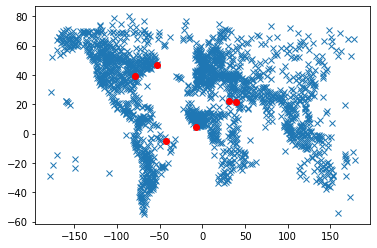

In [492]:
a=[]
plt.plot(long_list,lati_list,'x')
for elt in Noms:
    a=loc_df[loc_df.name==elt]
    plt.plot(list(a["longitude"]),list(a["latitude"]),'ro')

